In [63]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)


In [64]:
trainfile = "./data/used_car_train_20200313.csv"
testfile = "./data/used_car_testB_20200421.csv"


In [65]:
train_df = pd.read_csv(trainfile, sep=' ', index_col=0)
test_df = pd.read_csv(testfile, sep=' ', index_col=0)
train_df.head()

name   regDate  model  brand  bodyType  fuelType  gearbox  power  \
SaleID                                                                       
0          736  20040402   30.0      6       1.0       0.0      0.0     60   
1         2262  20030301   40.0      1       2.0       0.0      0.0      0   
2        14874  20040403  115.0     15       1.0       0.0      0.0    163   
3        71865  19960908  109.0     10       0.0       0.0      1.0    193   
4       111080  20120103  110.0      5       1.0       0.0      0.0     68   

        kilometer notRepairedDamage  regionCode  seller  offerType  creatDate  \
SaleID                                                                          
0            12.5               0.0        1046       0          0   20160404   
1            15.0                 -        4366       0          0   20160309   
2            12.5               0.0        2806       0          0   20160402   
3            15.0               0.0         434       0          0   20160312   
4             5.0               0.0        6977       0          0   20160313   

        price        v_0       v_1       v_2       v_3       v_4       v_5  \
SaleID                                                                       
0        1850  43.357796  3.966344  0.050257  2.159744  1.143786  0.235676   
1        3600  45.305273  5.236112  0.137925  1.380657 -1.422165  0.264777   
2        6222  45.978359  4.823792  1.319524 -0.998467 -0.996911  0.251410   
3        2400  45.687478  4.492574 -0.050616  0.883600 -2.228079  0.274293   
4        5200  44.383511  2.031433  0.572169 -1.571239  2.246088  0.228036   

             v_6       v_7       v_8       v_9      v_10      v_11      v_12  \
SaleID                                                                         
0       0.101988  0.129549  0.022816  0.097462 -2.881803  2.804097 -2.420821   
1       0.121004  0.135731  0.026597  0.020582 -4.900482  2.096338 -1.030483   
2       0.114912  0.165147  0.062173  0.027075 -4.846749  1.803559  1.565330   
3       0.110300  0.121964  0.033395  0.000000 -4.509599  1.285940 -0.501868   
4       0.073205  0.091880  0.078819  0.121534 -1.896240  0.910783  0.931110   

            v_13      v_14  
SaleID                      
0       0.795292  0.914762  
1      -1.722674  0.245522  
2      -0.832687 -0.229963  
3      -2.438353 -0.478699  
4       2.834518  1.923482

In [66]:
feature_names = train_df.columns
label_columns = ['price']
feature_names = np.setdiff1d(train_df.columns, label_columns)
# feature_names = np.setdiff1d(feature_names, ['SaleID'])
x_train_df = train_df[feature_names]
y_train_df = train_df[label_columns]
x_test_df = test_df[feature_names]

In [67]:
x_train_df.describe()

bodyType          brand     creatDate       fuelType  \
count  145494.000000  150000.000000  1.500000e+05  141320.000000   
mean        1.792369       8.052733  2.016033e+07       0.375842   
std         1.760640       7.864956  1.067328e+02       0.548677   
min         0.000000       0.000000  2.015062e+07       0.000000   
25%         0.000000       1.000000  2.016031e+07       0.000000   
50%         1.000000       6.000000  2.016032e+07       0.000000   
75%         3.000000      13.000000  2.016033e+07       1.000000   
max         7.000000      39.000000  2.016041e+07       6.000000   

             gearbox      kilometer          model           name  offerType  \
count  144019.000000  150000.000000  149999.000000  150000.000000   150000.0   
mean        0.224943      12.597160      47.129021   68349.172873        0.0   
std         0.417546       3.919576      49.536040   61103.875095        0.0   
min         0.000000       0.500000       0.000000       0.000000        0.0   
25%         0.000000      12.500000      10.000000   11156.000000        0.0   
50%         0.000000      15.000000      30.000000   51638.000000        0.0   
75%         0.000000      15.000000      66.000000  118841.250000        0.0   
max         1.000000      15.000000     247.000000  196812.000000        0.0   

               power       regDate     regionCode         seller  \
count  150000.000000  1.500000e+05  150000.000000  150000.000000   
mean      119.316547  2.003417e+07    2583.077267       0.000007   
std       177.168419  5.364988e+04    1885.363218       0.002582   
min         0.000000  1.991000e+07       0.000000       0.000000   
25%        75.000000  1.999091e+07    1018.000000       0.000000   
50%       110.000000  2.003091e+07    2196.000000       0.000000   
75%       150.000000  2.007111e+07    3843.000000       0.000000   
max     19312.000000  2.015121e+07    8120.000000       1.000000   

                 v_0            v_1           v_10           v_11  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean       44.406268      -0.044809      -0.001000       0.009035   
std         2.457548       3.641893       3.772386       3.286071   
min        30.451976      -4.295589      -9.168192      -5.558207   
25%        43.135799      -3.192349      -3.722303      -1.951543   
50%        44.610266      -3.052671       1.624076      -0.358053   
75%        46.004721       4.000670       2.844357       1.255022   
max        52.304178       7.320308      12.357011      18.819042   

                v_12           v_13           v_14            v_2  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean        0.004813       0.000313      -0.000688       0.080765   
std         2.517478       1.288988       1.038685       2.929618   
min        -9.639552      -4.153899      -6.546556      -4.470671   
25%        -1.871846      -1.057789      -0.437034      -0.970671   
50%        -0.130753      -0.036245       0.141246      -0.382947   
75%         1.776933       0.942813       0.680378       0.241335   
max        13.847792      11.147669       8.658418      19.035496   

                 v_3            v_4            v_5            v_6  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean        0.078833       0.017875       0.248204       0.044923   
std         2.026514       1.193661       0.045804       0.051743   
min        -7.275037      -4.364565       0.000000       0.000000   
25%        -1.462580      -0.921191       0.243615       0.000038   
50%         0.099722      -0.075910       0.257798       0.000812   
75%         1.565838       0.868758       0.265297       0.102009   
max         9.854702       6.829352       0.291838       0.151420   

                 v_7            v_8            v_9  
count  150000.000000  150000.000000  150000.000000  
mean        0.124692       0.058144       0.061996  
std         0.201410       0.029186     

In [68]:
x_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   bodyType           145494 non-null  float64
 1   brand              150000 non-null  int64  
 2   creatDate          150000 non-null  int64  
 3   fuelType           141320 non-null  float64
 4   gearbox            144019 non-null  float64
 5   kilometer          150000 non-null  float64
 6   model              149999 non-null  float64
 7   name               150000 non-null  int64  
 8   notRepairedDamage  150000 non-null  object 
 9   offerType          150000 non-null  int64  
 10  power              150000 non-null  int64  
 11  regDate            150000 non-null  int64  
 12  regionCode         150000 non-null  int64  
 13  seller             150000 non-null  int64  
 14  v_0                150000 non-null  float64
 15  v_1                150000 non-null  float64
 16  v_

In [69]:
x_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 200000 to 249999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bodyType           48496 non-null  float64
 1   brand              50000 non-null  int64  
 2   creatDate          50000 non-null  int64  
 3   fuelType           47076 non-null  float64
 4   gearbox            48032 non-null  float64
 5   kilometer          50000 non-null  float64
 6   model              50000 non-null  float64
 7   name               50000 non-null  int64  
 8   notRepairedDamage  50000 non-null  object 
 9   offerType          50000 non-null  int64  
 10  power              50000 non-null  int64  
 11  regDate            50000 non-null  int64  
 12  regionCode         50000 non-null  int64  
 13  seller             50000 non-null  int64  
 14  v_0                50000 non-null  float64
 15  v_1                50000 non-null  float64
 16  v_10            

从训练集中可以看出, offerType 是 冗余特征, 将其剔除</br>
在测试集中, seller属性和offerType属性的属性值都一样, 因此可以在训练集中忽略这两列特征

In [70]:
# 'model' 特征只有一个样本是NaN, 可以考虑删除该样本 或者 使用众数填充, 这里我们选择删除该样本
x_train_df[x_train_df['model'].isnull()]

bodyType  brand  creatDate  fuelType  gearbox  kilometer  model  \
SaleID                                                                    
38424        6.0     37   20160320       1.0      1.0        2.0    NaN   

          name notRepairedDamage  offerType  power   regDate  regionCode  \
SaleID                                                                     
38424   148730               0.0          0    190  20150809        1425   

        seller        v_0       v_1    v_10     v_11      v_12       v_13  \
SaleID                                                                      
38424        0  41.139365 -2.167089  1.6757 -3.25056  0.876001  11.147669   

            v_14       v_2       v_3       v_4       v_5       v_6  v_7  \
SaleID                                                                    
38424   8.658418 -3.436008 -7.275037  6.829352  0.181562  0.002092  0.0   

             v_8       v_9  
SaleID                      
38424   0.148487  0.222787

In [71]:
# 删除 model=NaN 的样本
mask = ~x_train_df['model'].isnull()
x_train_df = x_train_df.loc[mask]
y_train_df = y_train_df.loc[mask]
print(x_train_df.shape)

(149999, 29)


In [72]:
# step1 合并train+test
feature_df = pd.concat([x_train_df, x_test_df], axis = 0)
# step2, 删除 offerType 特征, seller 特征
feature_names = np.setdiff1d(feature_names, ['offerType', 'seller'])
feature_df = feature_df[feature_names]
print(feature_df.shape)

(199999, 28)


In [73]:
# 填充 'notRepairedDamage' 列, 将未标注的数据标注为2
col_notRepairedDamage = feature_df['notRepairedDamage'].replace(to_replace='-', value=2)
col_notRepairedDamage = col_notRepairedDamage.astype(float).astype(int)
feature_df['notRepairedDamage'] = col_notRepairedDamage

### 将训练特征和测试集特征叠加在一起, 观察相关性

bodyType, fuelType, gearbox 三列特征 具有较多的缺失值, 分别为5000, 9000, 6000; 总样本量为150000</br>
|  字段名  |  含义  |
|  -----   | ----  |
| bodyType | 车身类型. 豪华轿车：0，微型车：1，厢型车：2，大巴车：3，敞篷车：4，双门汽车：5，商务车：6，搅拌车：7|
| fuelType | 燃油类型. 汽油：0，柴油：1，液化石油气：2，天然气：3，混合动力：4，其他：5，电动：6|
| gearbox | 变速箱：手动：0，自动：1|

这三种特征都涉及车辆本身的性能定位, 是比较重要的特征, 因此使用近邻填充法填充这些缺失值</br>
在评估距离的特征方面, 可以筛去一些用处不大的特征, 特别是和汽车配置无关的特征: </br>
或者说, 我们选择部分属性进行近邻填充, 选择的属性和汽车配置高度相关</br>

regionCode, notRepairedDamage, kilometer, name<br>
由于regData(注册日期)的类型是int, 从数值上看会有很大差异, 因此我们可以对它进行分箱处理</br>
creatData(汽车上线时间) 也会有同样的问题, 因此也需要进行处理

In [106]:
# 查看特征相关性
# step1: 选出没有缺失值的样本
index_mask = ~x_train_df['bodyType'].isnull() & ~x_train_df['fuelType'].isnull() & ~x_train_df['gearbox'].isnull()
x_trian_df_np_NaN = x_train_df[index_mask]
# step2: 计算相关性
corr = x_trian_df_np_NaN.corr()

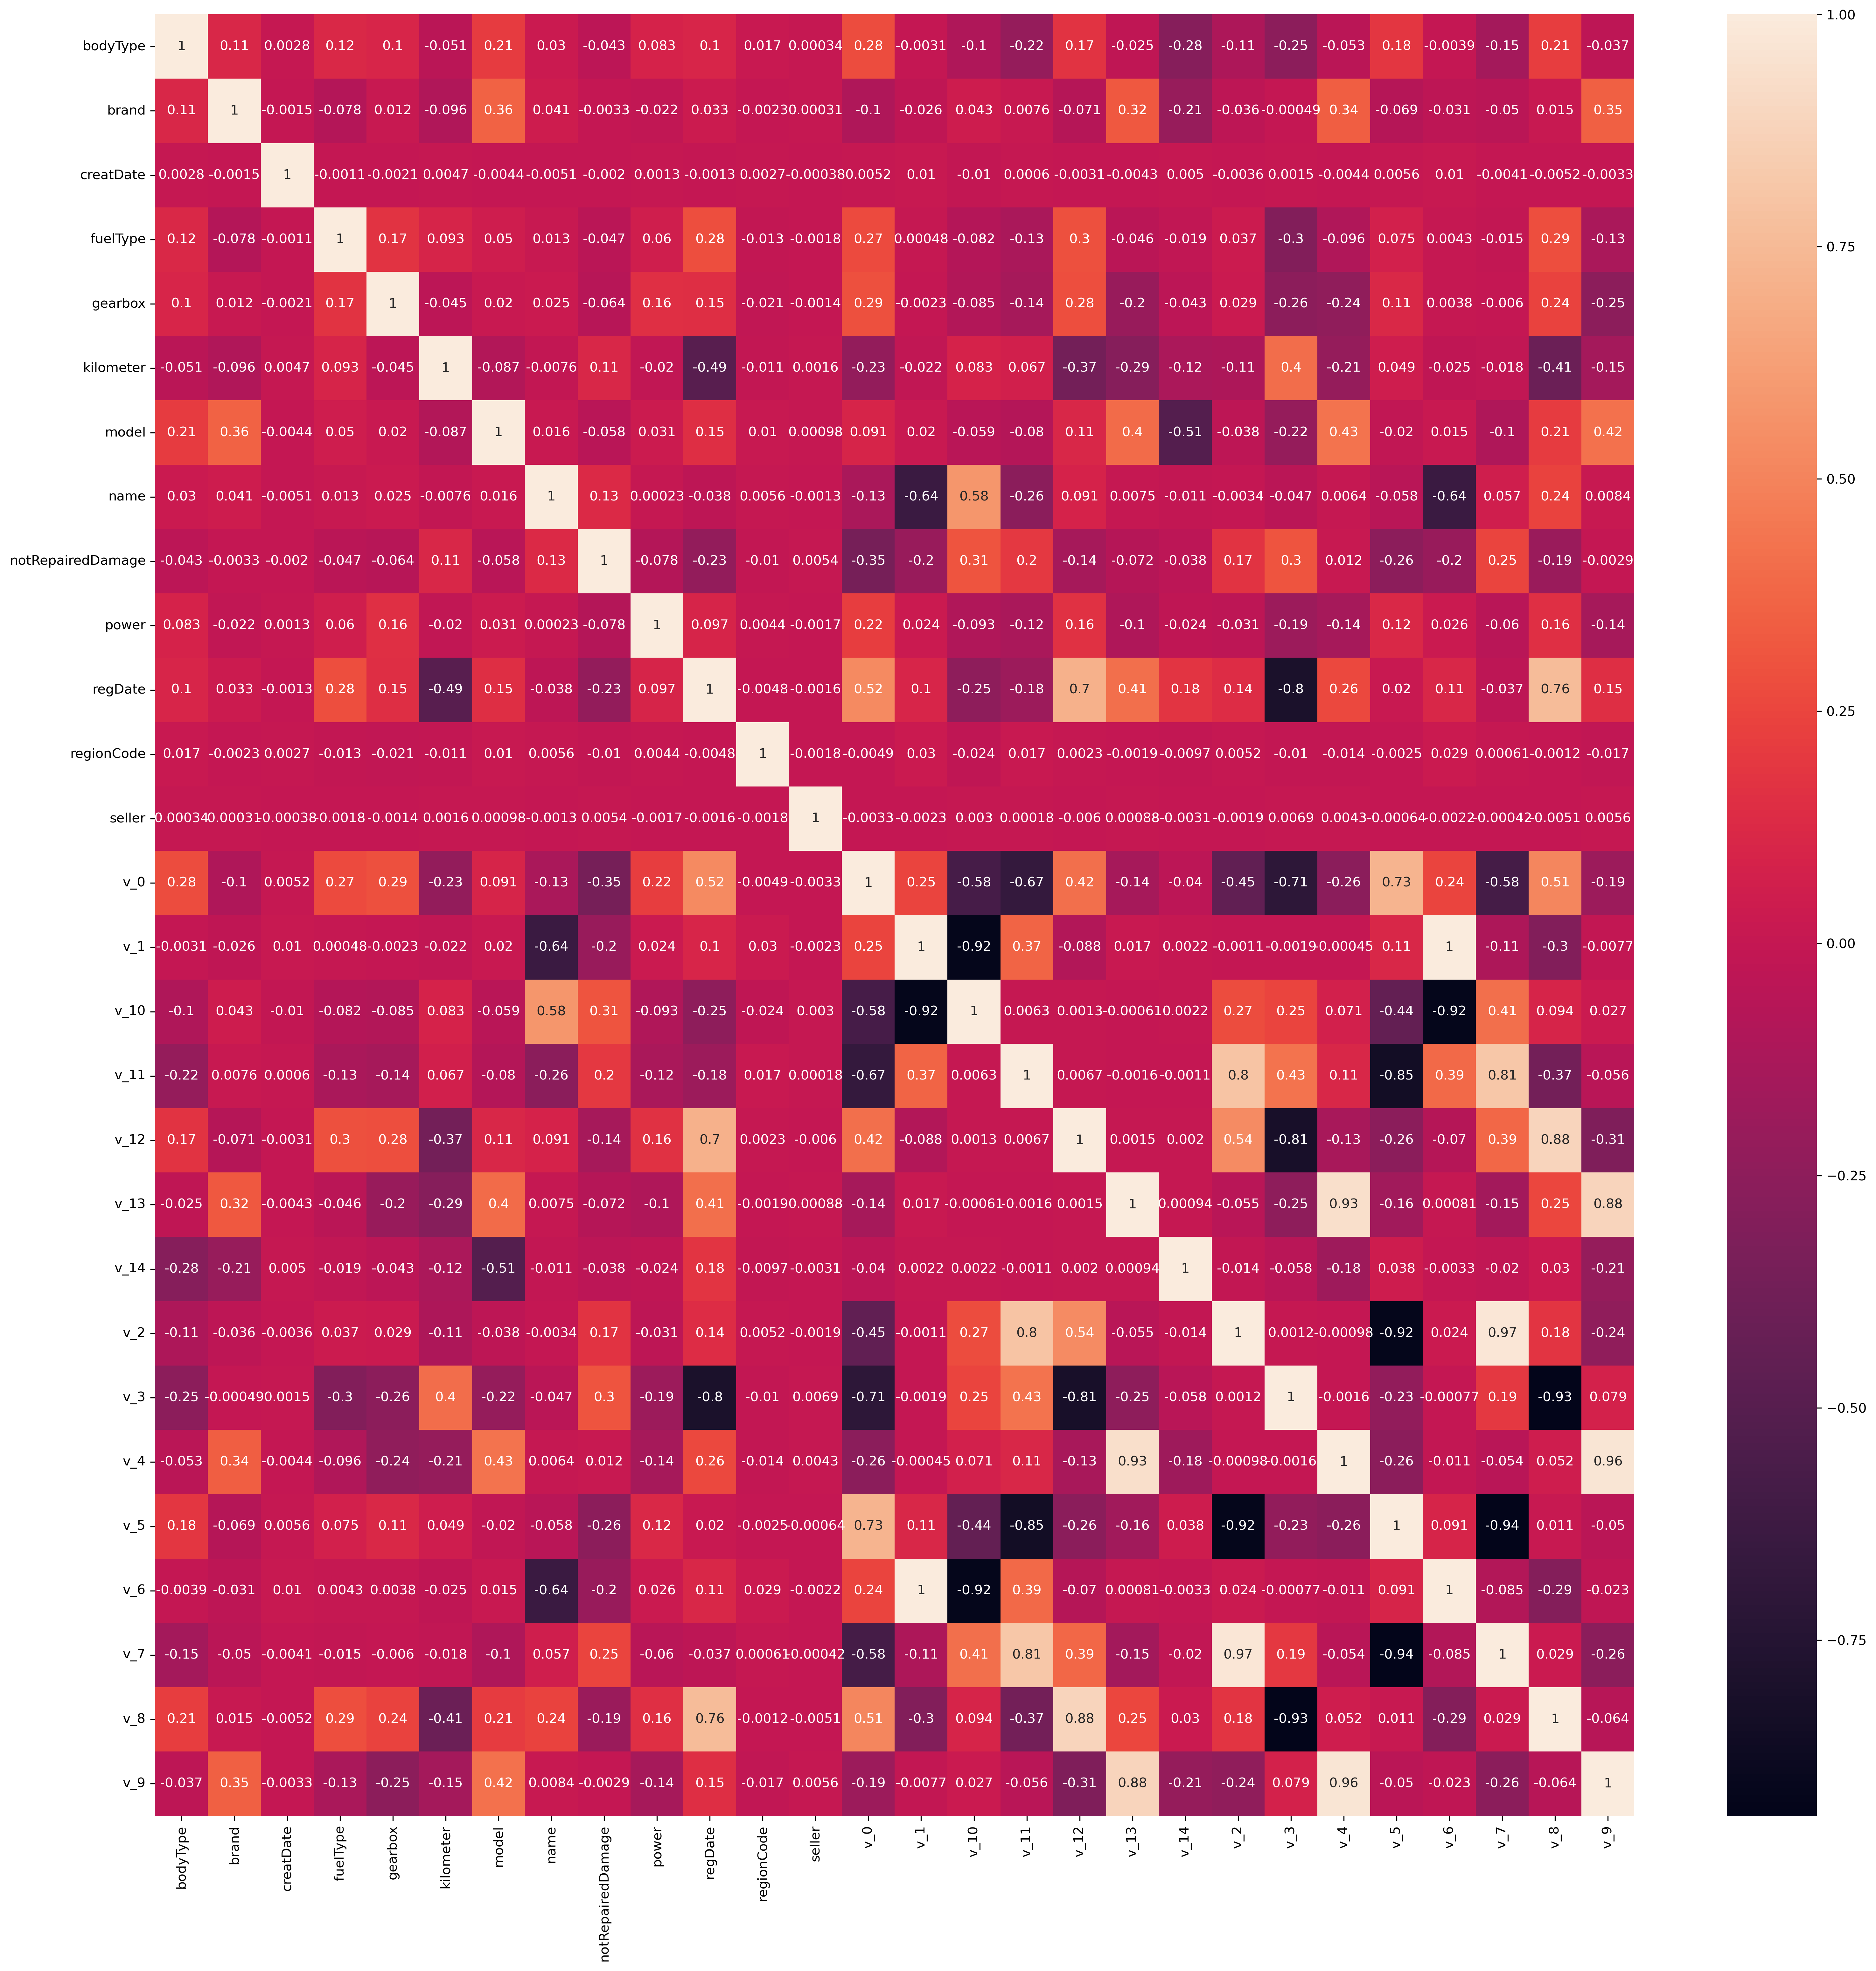

In [107]:
# step3: 绘制热力图
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,25), dpi=300)
ax = sns.heatmap(corr,annot=True)
fig.savefig('./特征相关性热力图.png')
plt.show()

In [108]:
# 选出缺失值特征最相关的一些特征
# step1, 对corr取绝对值
corr_abs = corr.abs()
dict_high_correct_features = {}
for feature_name in ['bodyType', 'fuelType', 'gearbox']:
    dict_high_correct_features[feature_name] = corr_abs[feature_name].loc[corr_abs[feature_name]>0.2].sort_values()[::-1].index
    print(corr_abs[feature_name].loc[corr_abs[feature_name]>0.2].sort_values()[::-1])

bodyType    1.000000
v_14        0.280831
v_0         0.275079
v_3         0.254163
v_11        0.219468
v_8         0.214305
model       0.207821
Name: bodyType, dtype: float64
fuelType    1.000000
v_3         0.300202
v_12        0.295141
v_8         0.286985
regDate     0.283412
v_0         0.265304
Name: fuelType, dtype: float64
gearbox    1.000000
v_0        0.291109
v_12       0.281270
v_3        0.255897
v_9        0.252480
v_8        0.240123
v_4        0.237833
v_13       0.200866
Name: gearbox, dtype: float64


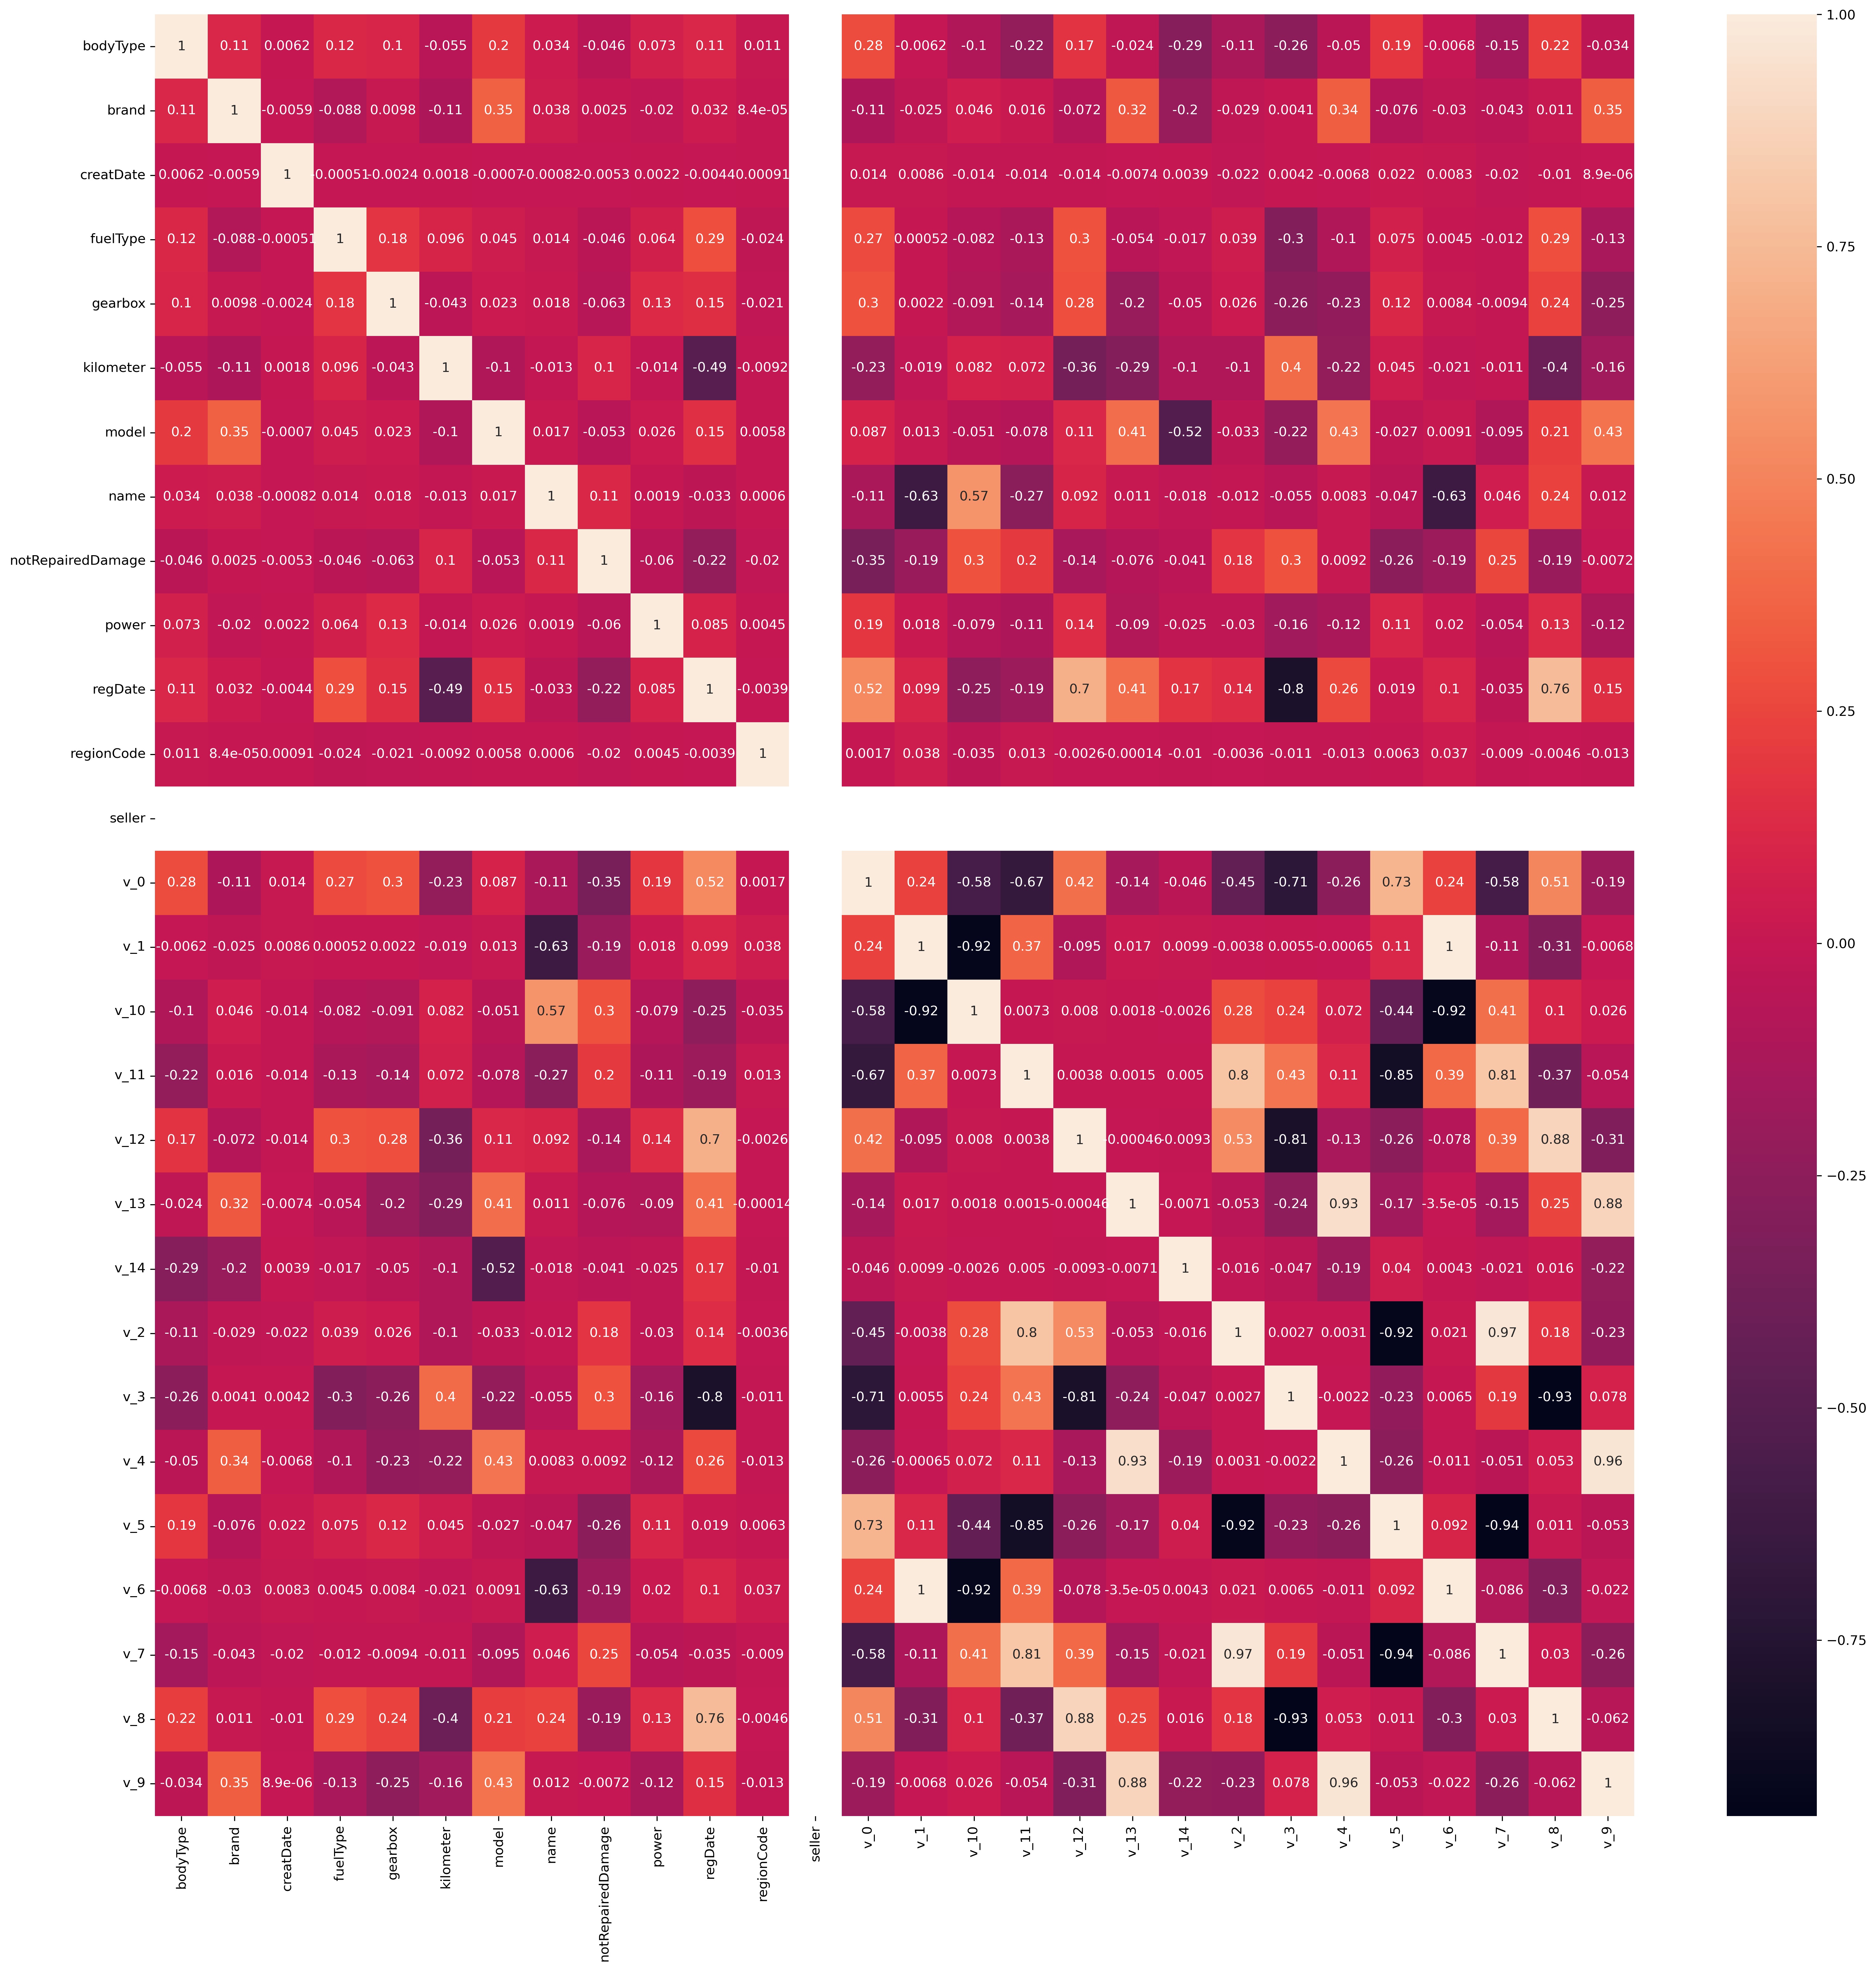

In [101]:
# 查看测试集的特征相关性
# step1: 选出没有缺失值的样本
index_mask = ~x_test_df['bodyType'].isnull() & ~x_test_df['fuelType'].isnull() & ~x_test_df['gearbox'].isnull()
x_test_df_np_NaN = x_test_df[index_mask]
# step2: 计算相关性
corr_test = x_test_df_np_NaN.corr()
# step3: 绘制热力图
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,25), dpi=300)
ax = sns.heatmap(corr_test,annot=True)
fig.savefig('./特征相关性热力图_测试集.png')
plt.show()

In [103]:
corr_test_abs = corr_test.abs()
dict_high_correct_features = {}
for feature_name in ['bodyType', 'fuelType', 'gearbox']:
    dict_high_correct_features[feature_name] = corr_test_abs[feature_name].loc[corr_test_abs[feature_name]>0.2].sort_values()[::-1].index
    print(corr_test_abs[feature_name].loc[corr_test_abs[feature_name]>0.2].sort_values()[::-1])

bodyType    1.000000
v_14        0.285219
v_0         0.279291
v_3         0.257220
v_11        0.223699
v_8         0.217464
model       0.203442
Name: bodyType, dtype: float64
fuelType    1.000000
v_3         0.299002
v_12        0.295884
regDate     0.286112
v_8         0.285164
v_0         0.266053
Name: fuelType, dtype: float64
gearbox    1.000000
v_0        0.296257
v_12       0.281506
v_3        0.258114
v_9        0.245788
v_8        0.240474
v_4        0.231702
Name: gearbox, dtype: float64


通过比较训练集和测试集的特征相关性, 我们可以认为, 有缺失值的特征的相关特征是可信的

根据上方热力图我们可以看到, 高度相关性的特征对如下所示</br>
| 特征名 | 高相关的特征 |
|-------|-------------|
|bodyType| model, v_0, v_12, v_5, v_8 |
|fuelType| regData, v_0, v_12, v_2, v_8|
|gearbox | v_0, v_12, v_2, v_5, v_8 | 

下面使用这些高相关的特征对缺失值进行近邻填充

In [76]:
dict_high_correct_features

{'bodyType': Index(['bodyType', 'v_5', 'v_0', 'v_8', 'v_12', 'model'], dtype='object'),
 'fuelType': Index(['fuelType', 'v_12', 'v_0', 'v_8', 'regDate', 'v_2'], dtype='object'),
 'gearbox': Index(['gearbox', 'v_0', 'v_12', 'v_5', 'v_8', 'v_2'], dtype='object')}

In [80]:
# 在全体数据集上填充
from sklearn.impute import KNNImputer

# step1, 逐特征填充
for feature_name, index_high_corr in dict_high_correct_features.items():
    df = feature_df[index_high_corr]
#     print(df.shape)
    hot_deck_imputer = KNNImputer(n_neighbors=5, weights="distance") 
    new_features = hot_deck_imputer.fit_transform(df)
#     print(("新特征的维度", new_features.shape))
    feature_df[feature_name] = new_features[:, 0]

# step2, 拆分 train, test
x_train_df = feature_df.loc[x_train_df.index]
x_test_df = feature_df.loc[x_test_df.index]

In [81]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 249999
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   bodyType           199999 non-null  float64
 1   brand              199999 non-null  int64  
 2   creatDate          199999 non-null  int64  
 3   fuelType           199999 non-null  float64
 4   gearbox            199999 non-null  float64
 5   kilometer          199999 non-null  float64
 6   model              199999 non-null  float64
 7   name               199999 non-null  int64  
 8   notRepairedDamage  199999 non-null  int32  
 9   power              199999 non-null  int64  
 10  regDate            199999 non-null  int64  
 11  regionCode         199999 non-null  int64  
 12  seller             199999 non-null  int64  
 13  v_0                199999 non-null  float64
 14  v_1                199999 non-null  float64
 15  v_10               199999 non-null  float64
 16  v_

### 在训练集上查看特征和标签的相关性

In [109]:
from scipy.stats import pearsonr
corr_label = []
for column_name in x_train_df.columns:
    corr_label.append(list(pearsonr(np.squeeze(y_train_df), x_train_df[column_name])))
corr_label_df = pd.DataFrame(corr_label, index=x_train_df.columns, columns=['pcc', 'p-value'])
corr_label_df.abs().sort_values(by='pcc', ascending=False)


pcc        p-value
v_3                0.730919   0.000000e+00
v_12               0.692883   0.000000e+00
v_8                0.685776   0.000000e+00
v_0                0.628516   0.000000e+00
regDate            0.611952   0.000000e+00
kilometer          0.440475   0.000000e+00
gearbox            0.330068   0.000000e+00
v_11               0.275313   0.000000e+00
v_10               0.246218   0.000000e+00
bodyType           0.243734   0.000000e+00
power              0.219842   0.000000e+00
notRepairedDamage  0.216056   0.000000e+00
fuelType           0.206428   0.000000e+00
v_9                0.206408   0.000000e+00
v_5                0.164390   0.000000e+00
v_4                0.147330   0.000000e+00
model              0.136983   0.000000e+00
v_2                0.085376  1.253296e-240
v_6                0.069008  9.842003e-158
v_1                0.060942  2.154072e-123
v_7                0.053007   8.768719e-94
brand              0.043943   5.165582e-65
v_14               0.035611   2.680979e-43
v_13               0.014321   2.910262e-08
regionCode         0.014060   5.157601e-08
creatDate          0.002959   2.518308e-01
seller             0.002004   4.375851e-01
name               0.001981   4.430150e-01

观察上面的表格, 我们可以看出: name 和 seller 特征和标签的相关性是最小的, 所以可以删除这两个特征</br>
虽然createData与label的相关性也很小, 但从直觉上来说, 它应该与二手车价格有着一定的关系. 猜测, 它与regData(交易日期)的组合特征可能会提升这个特征的信息表达能力</br>
regionCode的相关性也很小, 可能是因为地区编码没有做独热编码处理的原因. 因此需要对其进行处理</br>

在全体数据集上, 删除 name 和 seller 特征

In [119]:
feature_names = np.setdiff1d(feature_names, ['name', 'seller'])
feature_df = feature_df[feature_names]
feature_df.head()

bodyType  brand  creatDate  fuelType  gearbox  kilometer  model  \
SaleID                                                                    
0            1.0      6   20160404       0.0      0.0       12.5   30.0   
1            2.0      1   20160309       0.0      0.0       15.0   40.0   
2            1.0     15   20160402       0.0      0.0       12.5  115.0   
3            0.0     10   20160312       0.0      1.0       15.0  109.0   
4            1.0      5   20160313       0.0      0.0        5.0  110.0   

        notRepairedDamage  power   regDate  regionCode        v_0       v_1  \
SaleID                                                                        
0                       0     60  20040402        1046  43.357796  3.966344   
1                       2      0  20030301        4366  45.305273  5.236112   
2                       0    163  20040403        2806  45.978359  4.823792   
3                       0    193  19960908         434  45.687478  4.492574   
4                       0     68  20120103        6977  44.383511  2.031433   

            v_10      v_11      v_12      v_13      v_14       v_2       v_3  \
SaleID                                                                         
0      -2.881803  2.804097 -2.420821  0.795292  0.914762  0.050257  2.159744   
1      -4.900482  2.096338 -1.030483 -1.722674  0.245522  0.137925  1.380657   
2      -4.846749  1.803559  1.565330 -0.832687 -0.229963  1.319524 -0.998467   
3      -4.509599  1.285940 -0.501868 -2.438353 -0.478699 -0.050616  0.883600   
4      -1.896240  0.910783  0.931110  2.834518  1.923482  0.572169 -1.571239   

             v_4       v_5       v_6       v_7       v_8       v_9  
SaleID                                                              
0       1.143786  0.235676  0.101988  0.129549  0.022816  0.097462  
1      -1.422165  0.264777  0.121004  0.135731  0.026597  0.020582  
2      -0.996911  0.251410  0.114912  0.165147  0.062173  0.027075  
3      -2.228079  0.274293  0.110300  0.121964  0.033395  0.000000  
4       2.246088  0.228036  0.073205  0.091880  0.078819  0.121534

通过查看上放特征之间相关性的热力图, 我们可以看到几乎所有特征和regionCOde的想关性都很小, 可以考虑删除该特征

('regionCode唯一值的数量', 8010)


(array([40747., 35485., 32279., 25622., 21465., 16203., 12217.,  8250.,
         5246.,  2485.]),
 array([   0.,  812., 1624., 2436., 3248., 4060., 4872., 5684., 6496.,
        7308., 8120.]),
 <BarContainer object of 10 artists>)

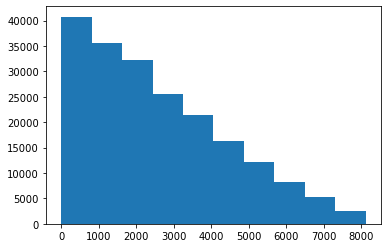

In [132]:
# 对regionCode做离散化处理
regionCode_se = feature_df['regionCode']
# step1, 查看regionCode唯一值的数量
print(('regionCode唯一值的数量', len(regionCode_se.unique()) ))
# step2, 查看regionCode的分布
plt.hist(regionCode_se)


In [135]:
# 删除 regionCode 特征
feature_names = np.setdiff1d(feature_names, ['regionCode'])
feature_df = feature_df[feature_names]

#### 查看标签分布

(array([1.23906e+05, 1.89270e+04, 4.91800e+03, 1.34000e+03, 4.70000e+02,
        1.88000e+02, 1.24000e+02, 6.00000e+01, 4.80000e+01, 1.80000e+01]),
 array([1.10000e+01, 1.00098e+04, 2.00086e+04, 3.00074e+04, 4.00062e+04,
        5.00050e+04, 6.00038e+04, 7.00026e+04, 8.00014e+04, 9.00002e+04,
        9.99990e+04]),
 <BarContainer object of 10 artists>)

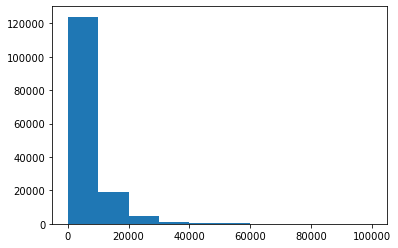

In [136]:
plt.hist(y_train_df)

(array([55914., 29785., 17192., 12121.,  8894.,  5648.,  4719.,  3684.,
         2806.,  1963.]),
 array([1.10000e+01, 2.00980e+03, 4.00860e+03, 6.00740e+03, 8.00620e+03,
        1.00050e+04, 1.20038e+04, 1.40026e+04, 1.60014e+04, 1.80002e+04,
        1.99990e+04]),
 <BarContainer object of 10 artists>)

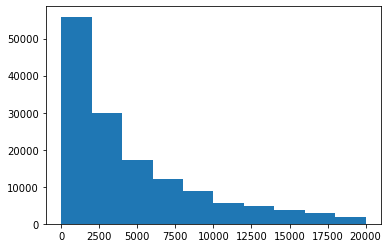

In [143]:
# 进一步查看20000以内的标签分布
plt.hist(y_train_df[y_train_df<20000])

## 训练模型

#### 划分训练/验证集
为了能够分层划分, 使训练验证集的标签分布尽可能相似, 将标签划分为几个区间:</br>
1. 小于2500
2. 2500~7500
3. 7500~20000
2. 大于20000小于30000
3. 大于30000

如上所述, 将标签划分为5个区间

In [150]:
marks.shape

(149999, 1)

In [151]:
x_train_df.shape

(149999, 28)

In [153]:
np.unique(marks, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([64523, 47487, 28044,  8756,  1189], dtype=int64))

In [171]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
import joblib
# 划分区间
marks = np.zeros_like(y_train_df)
marks[ (y_train_df>2500) & (y_train_df<=7500)] = 1
marks[(y_train_df>7500) & (y_train_df<=17500)] = 2
marks[(y_train_df>17500) & (y_train_df<=37500)] = 3
marks[y_train_df>37500] = 4

# 五折交叉验证划分数据
rskf = RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=666)
cv = [(t,v) for (t,v) in rskf.split(x_train_df, marks)]

# # 保存cv
# with open("./cache/cv.pkl", 'wb') as handle:
#     joblib.dump(cv, handle)
    
# # 单次划分训练验证集
# x_train, x_val, mask_y_train, mask_y_val = train_test_split(x_train_df, marks, test_size=0.2, shuffle=True, stratify=marks, random_state=666)
# y_train = y_train_df.iloc[mask_y_train.squeeze()]
# y_val = y_train_df.iloc[mask_y_val.squeeze()]

In [172]:
# 定义交叉验证pipeline
import time 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
def train_predict_pipeline(x, y, cv, fit_func, ):
    """
    Parameters
    ----------
    x: array_like
    y: array_like
    cv: list[array_like], shape (#folds, )
    fit_func: function, 函数对象
        参数必须要能够接受x_train, y_train, 
        并且返回模型, 模型可以调用predict方法
    """
    begin_time = time.time()
    x = np.array(x)
    y = np.reshape(y, -1)
    y_pred = np.empty_like(y)
    for (train_idx,val_idx) in cv:
        x_train = x[train_idx]
        x_val = x[val_idx]
        y_train = y[train_idx]
        y_val = y[val_idx]
        model = fit_func(x_train, y_train)
        y[val_idx] = model.predict(x_val)
    
    mae = mean_absolute_error(y, y_pred)
    end_time = time.time()
    print(f"elapsed time:\t{end_time-begin_time:.2f}" )
    print(f"mae:\t{mae:.4f}" )
    return mae, y_pred

In [174]:
from sklearn.ensemble import RandomForestRegressor
def fit_rf(x_train, y_train):
    """拟合随机森林模型
    Parameters
    ----------
    x_train: array_like
    y_train: array_like
    
    Returns
    -------
    model: object, 拥有predict方法的模型对象
    """
    rf = RandomForestRegressor().fit(x_train, y_train)
    return rf

In [ ]:
from lightgbm import LGBMRegressori
def fit_lgbm(x_train, y_train):
    

In [169]:
train_predict_pipeline(x_train, y_train, cv, fit_rf)

##### 使用随机森林预测

In [162]:
rf = RandomForestRegressor().fit(x_train_df, y_train_df)
y_pred = rf.predict(x_test_df)

C:\TEMP\ipykernel_30440\2938122144.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor().fit(x_train_df, y_train_df)


In [166]:
# 存储预测结果为csv
columns_res = ['SaleID','price']
pd.DataFrame(np.transpose([x_test_df.index, y_pred]), columns=columns_res).to_csv('./result/used_car_submit_0406.csv')